**CRISP-DM**

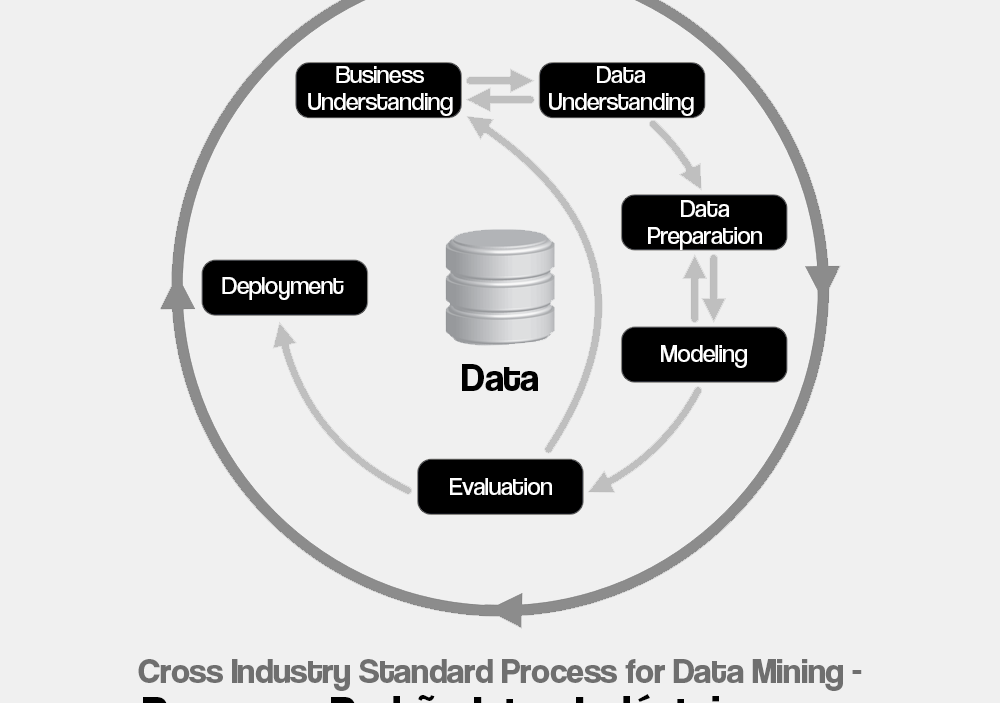

# Instalação

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import string
import re
from wordcloud import WordCloud
from itertools import islice
import spacy
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import tensorflow as tf
from scipy.stats import shapiro
from scipy.stats import kstest
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, InputLayer

# Business understanding - Entendimento do negócio
* "Identificar objetivos do negócio sem vieses inconscientes."
* https://dnc.group/blog/data-science/metodologia-crisp-dm/

# Data understanding - Entendimento dos dados
* Ver de onde virão seus dados e entendê-los de acordo com o objetivo levantado.
* https://dnc.group/blog/data-science/metodologia-crisp-dm/

In [2]:
PATH = "C:/Users/samue/Desktop/NLP 2023 ESTUDOS/projeto_notas_para_animes/dataset"
df = pd.read_csv(PATH + "/Anime_Top10000.csv")

## Inspecionando o DataFrame

- Visualizar as primeiras linhas do DataFrame
- Visualizar as últimas linhas do DataFrame
- Obter informações sobre o DataFrame
- Obter estatísticas descritivas do DataFrame
- Verificar as dimensões do DataFrame
- Verificar as colunas do DataFrame
- Verificar os tipos de dados das colunas
- Verificar a presença de valores nulos em cada coluna
- Verificar a presença de duplicatas no DataFrame

In [3]:
#Visualizar as primeiras linhas do DataFrame
df.head()

,Anime_Name,Anime_Episodes,Anime_Air_Years,Anime_Rating,Synopsis
0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,9.18,"""In order for something to be obtained, someth..."
1,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,9.11,Seeking to restore humanity's diminishing hope...
2,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,9.11,The self-proclaimed mad scientist Rintarou Oka...
3,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,9.09,"Gintoki, Shinpachi, and Kagura return as the f..."
4,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,9.08,Hunter x Hunter is set in a world where Hunter...


In [4]:
#Visualizar as últimas linhas do DataFrame
df.tail()

,Anime_Name,Anime_Episodes,Anime_Air_Years,Anime_Rating,Synopsis
9995,Animagear,ONA (1 eps),Jul 2019 - Jul 2019,5.43,Stop motion animation of aliens on a guided to...
9996,Cheating Craft,TV (12 eps),Oct 2016 - Dec 2016,5.43,A music video-style advertisement for Lotte's ...
9997,Circuit Angel: Ketsui no Starting Grid,OVA (1 eps),May 1987 - May 1987,5.43,Nobumasa is a boy who works part-time in a sho...
9998,Dengeki Oshioki Musume Gootaman R: Ai to Kanas...,OVA (1 eps),Oct 1994 - Oct 1994,5.43,Recap episodes of Ai Tenchi Muyou!
9999,Fairy Ranmaru: Anata no Kokoro Otasuke Shimasu,TV (12 eps),Apr 2021 -,5.43,Toru Matsumoto's official music video with Mir...


In [5]:
#Obter informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Anime_Name       10000 non-null  object 
 1   Anime_Episodes   10000 non-null  object 
 2   Anime_Air_Years  10000 non-null  object 
 3   Anime_Rating     10000 non-null  float64
 4   Synopsis         10000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 390.8+ KB


In [6]:
#Obter estatísticas descritivas do DataFrame
df.describe()

,Anime_Rating
count,10000.000000
mean,6.739006
std,0.731757
min,5.430000
25%,6.170000
50%,6.680000
75%,7.260000
max,9.180000


In [7]:
#Obter estatísticas descritivas do DataFrame
df.shape

(10000, 5)

In [8]:
#Verificar as colunas do DataFrame
df.columns

Index(['Anime_Name', 'Anime_Episodes', 'Anime_Air_Years', 'Anime_Rating',
       'Synopsis'],
      dtype='object')

In [9]:
#Verificar os tipos de dados das colunas
df.dtypes

Anime_Name          object
Anime_Episodes      object
Anime_Air_Years     object
Anime_Rating       float64
Synopsis            object
dtype: object

In [10]:
#Verificar a presença de valores nulos em cada coluna
df.isnull().sum()

Anime_Name         0
Anime_Episodes     0
Anime_Air_Years    0
Anime_Rating       0
Synopsis           0
dtype: int64

In [11]:
#Verificar a presença de duplicatas no DataFrame
df.duplicated().sum()

0

**Insights**:
- O dataset contém 10000 registros (linhas) distribuídos em 5 colunas.
- Não tem dados nulos.
- Não tem valores duplicados.

## Estatística

- Média
- Mediana
- Moda
- Desvio Padrão
- Valor Mínimo e Máximo
- Quartis
- Correlação
- Amplitude
- Assimetria (skewness)
- Frequência das Palavras

**Média**

In [12]:
#Média
df['Anime_Rating'].sum() / len(df['Anime_Rating'])

6.739006

In [13]:
#Média
df['Anime_Rating'].mean()

6.739006

**Mediana**

In [14]:
#Ordenar os valores em ordem crescente
sorted_ratings = sorted(df['Anime_Rating'])
n = len(sorted_ratings)
#Verificar se o número de elementos é par ou ímpar
if n % 2 == 0:
    #O número de elementos é par
    mediana_manual = (sorted_ratings[n//2-1] + sorted_ratings[n//2]) / 2
else:
    #O número de elementos é ímpar
    mediana_manual = sorted_ratings[n//2]

In [15]:
mediana_manual

6.68

In [16]:
df['Anime_Rating'].median()

6.68

**Moda**

In [17]:
#Pegando cada valor e fazendo a contagem
moda_counts = df['Anime_Rating'].value_counts() 
#Selecionar o valor com a maior contagem
moda_manual = moda_counts.index[0]

In [18]:
moda_manual

6.46

In [19]:
df['Anime_Rating'].mode()

0    6.46
Name: Anime_Rating, dtype: float64

**Desvio Padrão**

In [20]:
mean = df['Anime_Rating'].sum() / len(df['Anime_Rating'])
variance = sum((x - mean) ** 2 for x in df['Anime_Rating']) / len(df['Anime_Rating'])
desvio_padrao_manual = variance ** 0.5

In [21]:
desvio_padrao_manual

0.7317205422591206

In [22]:
df['Anime_Rating'].std()

0.7317571310304162

**Valor Mínimo e Máximo**

In [23]:
(df['Anime_Rating'].min(), df['Anime_Rating'].max())

(5.43, 9.18)

**Quartis**

In [24]:
#Quartis (Q1, Q2, Q3)

In [25]:
df['Anime_Rating'].quantile([0.25, 0.5, 0.75])

0.25    6.17
0.50    6.68
0.75    7.26
Name: Anime_Rating, dtype: float64

**Correlação**

In [26]:
#df['Coluna1'].corr(df['Coluna2'])

**Amplitude total e diferença interquartil**

In [27]:
Q1 = df["Anime_Rating"].quantile(0.25)
Q3 = df["Anime_Rating"].quantile(0.75)

In [28]:
IQR = Q3 - Q1
IQR

1.0899999999999999

In [29]:
inferior = Q1 - (1.5 * IQR)
superior = Q3 + (1.5 * IQR)
inferior, superior

(4.535, 8.895)

**Assimetria (skewness)**

Medida da falta de simetria de uma determinada distribuição probabilística.

- $>0$ - Assimetria Positiva - Cauda direita - valores acima da média mais pesada
- $<0$ - Assimetria Negativa - Cauda esquerda - valores abaixo da média mais pesada
- $0$ - Simetria - Mesmo que uma distribuição Normal

In [30]:
df["Anime_Rating"].skew()

0.3308062745831679

**Frequência das Palavras**

In [31]:
palavras_1 = []

for index, row in df.iterrows():
    texto = row['Synopsis'] 
    tokens = word_tokenize(texto)
    palavras_1.extend(tokens)

In [32]:
frequencia_1 = FreqDist(palavras_1)
frequencia_1

FreqDist({'the': 47326, ',': 46758, '.': 35971, 'to': 24029, 'of': 22752, 'a': 22317, 'and': 21932, 'is': 11653, 'in': 11184, 'his': 8088, ...})

In [33]:
#Após o preprocessamento do texto, que pode envolver a remoção de palavras vazias, símbolos e outros passos de limpeza, é comum realizar uma nova análise para explorar as características do texto de maneira mais aprofundada

## Data visualization

**Top 10 Melhores Animes**

In [34]:
df[df["Anime_Rating"] >= 9]

,Anime_Name,Anime_Episodes,Anime_Air_Years,Anime_Rating,Synopsis
0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,9.18,"""In order for something to be obtained, someth..."
1,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,9.11,Seeking to restore humanity's diminishing hope...
2,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,9.11,The self-proclaimed mad scientist Rintarou Oka...
3,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,9.09,"Gintoki, Shinpachi, and Kagura return as the f..."
4,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,9.08,Hunter x Hunter is set in a world where Hunter...
5,Gintama',TV (51 eps),Apr 2011 - Mar 2012,9.07,According to an announcement made during this ...
6,Shingeki no Kyojin: The Final Season,TV (16 eps),Dec 2020 - Mar 2021,9.07,Gabi Braun and Falco Grice have been training ...
7,Ginga Eiyuu Densetsu,OVA (110 eps),Jan 1988 - Mar 1997,9.06,The 150-year-long stalemate between the two in...
8,Gintama': Enchousen,TV (13 eps),Oct 2012 - Mar 2013,9.04,"While Gintoki Sakata was away, the Yorozuya fo..."
9,3-gatsu no Lion 2nd Season,TV (22 eps),Oct 2017 - Mar 2018,9.00,"Now in his second year of high school, Rei Kir..."


**Top 10 Piores Animes**

In [35]:
df[df["Anime_Rating"] < 5]

,Anime_Name,Anime_Episodes,Anime_Air_Years,Anime_Rating,Synopsis


<Axes: xlabel='Anime_Rating', ylabel='Count'>

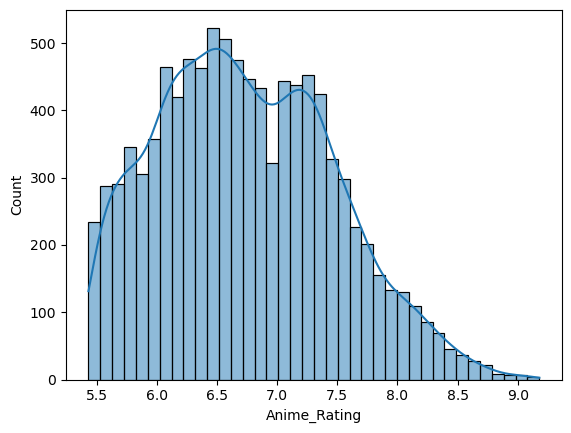

In [36]:
sns.histplot(x=df["Anime_Rating"], kde=True)

In [37]:
df["Anime_Episodes"].value_counts()

Movie (1 eps)      1627
TV (12 eps)        1129
Special (1 eps)    1011
OVA (1 eps)         747
TV (13 eps)         565
                   ... 
OVA (22 eps)          1
TV (291 eps)          1
TV (175 eps)          1
TV (192 eps)          1
Music (6 eps)         1
Name: Anime_Episodes, Length: 294, dtype: int64

In [38]:
df["Anime_Rating"].value_counts()

6.46    61
6.54    58
6.55    58
6.28    58
7.05    58
        ..
8.61     1
8.76     1
8.74     1
8.65     1
9.18     1
Name: Anime_Rating, Length: 354, dtype: int64

In [39]:
#Melhores animes
df_melhores = df[df["Anime_Rating"] >= 9]

<Axes: xlabel='Anime_Rating', ylabel='Anime_Name'>

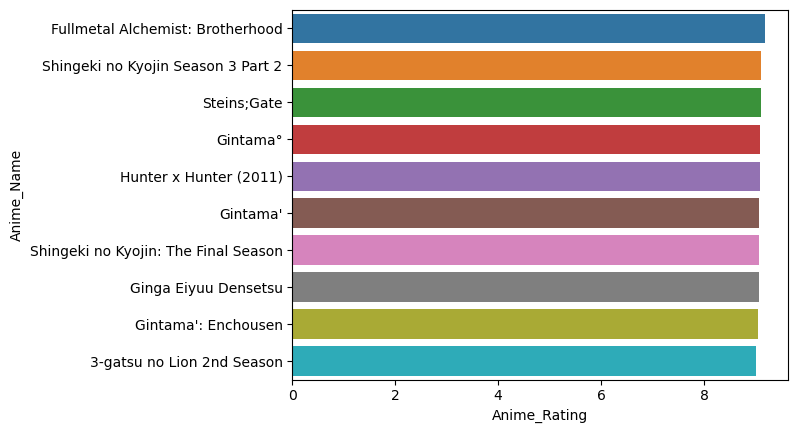

In [40]:
sns.barplot(data=df_melhores, x="Anime_Rating", y="Anime_Name")

<Axes: xlabel='Anime_Rating'>

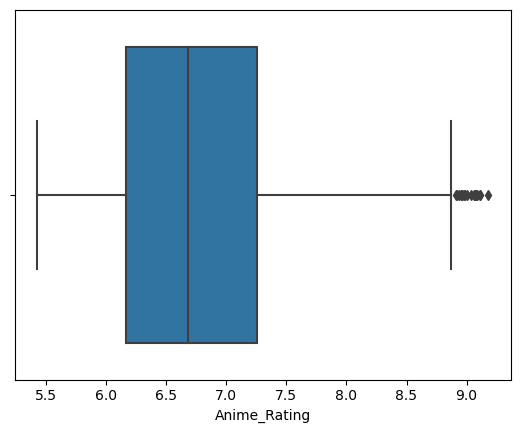

In [41]:
sns.boxplot(data=df, x="Anime_Rating")

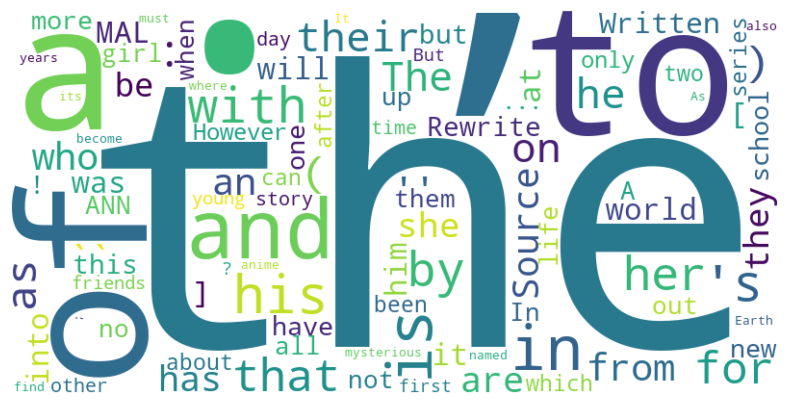

In [42]:
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(frequencia_1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Testes de normalidade**
- Teste de Shapiro-Wilk
- Teste de Kolmogorov-Smirnov

In [43]:
def teste_shapiro(variavel):
    
    statistic, p_value = shapiro(variavel)

    #Verificar se a variável segue uma distribuição normal
    if p_value > 0.05:
        return print("A variável segue uma distribuição normal")
    else:
        return print("A variável não segue uma distribuição normal")

In [44]:
def teste_ks(variavel):
    #Kolmogorov-Smirnov
    #A string 'norm' indica que estamos testando a hipótese de que os dados seguem uma distribuição normal.
    statistic, p_value = kstest(variavel, 'norm')

    #Verificar se a variável segue uma distribuição normal
    if p_value > 0.05:
        return print("A variável segue uma distribuição normal")
    else:
        return print("A variável não segue uma distribuição normal")

In [45]:
teste_shapiro(df['Anime_Rating'])

A variável não segue uma distribuição normal


D:\anaconda3\envs\mucadev\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
teste_ks(df['Anime_Rating'])

A variável não segue uma distribuição normal


**Insights**
- O conjunto de dados contém possíveis **outliers**, que são valores extremos ou discrepantes em relação aos demais dados.
- A distribuição dos dados não segue uma distribuição normal, indicando que eles podem apresentar uma forma de distribuição diferente.
- Durante a análise da frequência das palavras, podemos identificar a presença de palavras vazias e símbolos que devem ser removidos durante o preprocessamento do texto.

# Data Preparation - Preparação dos Dados
* pré-processamento
* https://dnc.group/blog/data-science/metodologia-crisp-dm/

In [47]:
df.head()

,Anime_Name,Anime_Episodes,Anime_Air_Years,Anime_Rating,Synopsis
0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,9.18,"""In order for something to be obtained, someth..."
1,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,9.11,Seeking to restore humanity's diminishing hope...
2,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,9.11,The self-proclaimed mad scientist Rintarou Oka...
3,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,9.09,"Gintoki, Shinpachi, and Kagura return as the f..."
4,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,9.08,Hunter x Hunter is set in a world where Hunter...


In [48]:
#carregando o modelo pré-treinado do spaCy chamado "en_core_web_md"
nlp = spacy.load("en_core_web_md")

### Outliers
- **Remoção**
- Transformação
- Substituição
    - media
    - mediana


In [49]:
inferior, superior

(4.535, 8.895)

In [50]:
df_sem_out  = df[(df['Anime_Rating'] >= inferior) & (df['Anime_Rating'] < superior)]

<Axes: xlabel='Anime_Rating'>

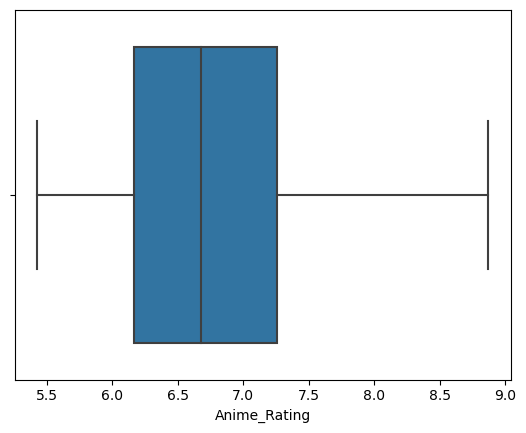

In [51]:
sns.boxplot(data=df_sem_out, x="Anime_Rating")

### Amostragem
- **Amostragem aleatória simples**
- Amostragem estratificada
- Amostragem por conglomerado
- Amostragem sistemática
- Amostragem por conveniência

In [52]:
#Amostragem aleatória simples
#df_amostra_aleatoria_simples = dataset.sample(n = 100, random_state = 1)

def amostragem_aleatoria_simples(dataset, amostras):
    return dataset.sample(n = amostras, random_state=1)

In [53]:
df_as = amostragem_aleatoria_simples(df_sem_out, 4000)

In [54]:
#df = df_as

### Pré-processamento

* Segmentação por sentenças
* Segmentação por unidades (Tokenização)
* Capitalização
* Remoção de palavras vazias (*stopwords*)
* Lematização e/ou Radicalização (*Stemming*)

In [55]:
#def preprocess(text):
    
    #text_norm = []
    #doc = nlp(text)
    
    #for token in doc:
        #if token.text.lower() not in string.punctuation and not token.is_digit and not token.is_space and token.lemma_.lower() not in nlp.Defaults.stop_words:
            #text_norm.append(token.lemma_.lower())
            
    #return text_norm

In [56]:
#Lista com algumas palavras e simbolos que estão no texto que são ruídos
tokens_remove = ["write", "—", "mal", "rewrite", "..."]

def preprocess(text):
    
    preprocessed_tokens = [
        token.lemma_.lower() for token in nlp(text) if token.text.lower() not in string.punctuation and not token.is_digit and not token.is_space and token.lemma_.lower() not in nlp.Defaults.stop_words and token.lemma_.lower() not in tokens_remove
    ] 
        
    #Depois fazer retornar uma string com os tokens juntos
    preprocessed_text = ' '.join(preprocessed_tokens)
    
    return preprocessed_tokens, preprocessed_text #para fazer o vocabulario tem que ser lista de tokens

In [57]:
#list_preprocessed_tokens = [preprocess(text) for text in df["Synopsis"]]    

list_preprocessed_tokens = []
list_text_norm = []

for text in df["Synopsis"]: #df_as
    preprocessed_tokens, preprocessed_text = preprocess(text)
    list_preprocessed_tokens.append(preprocessed_tokens)
    list_text_norm.append(preprocessed_text)

### Frequência e WordCloud

In [58]:
corpus_norm = " ".join(list_text_norm)

In [59]:
tokens_4 = word_tokenize(corpus_norm)
frequencia_2 = nltk.FreqDist(tokens_4)
display(frequencia_2.most_common(10))

[('source', 3831),
 ('world', 2723),
 ('girl', 2358),
 ('school', 2354),
 ('new', 2215),
 ('life', 2193),
 ('year', 2055),
 ('find', 1940),
 ('friend', 1863),
 ('ann', 1571)]

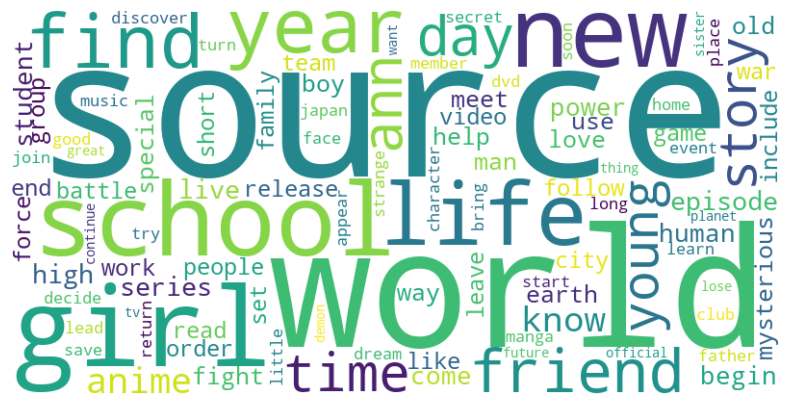

In [60]:
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(frequencia_2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Embedding das palavras - incorporação das palavras





- Etapas:
    - Preprocessamento dos textos (Fazer a limpeza dos dados) 
    - Construção do vocabulário (Lista de Palavras Únicas)
    - Atribuição de índices às palavras (word-id)
    - Representação numérica das palavras (Vectores)
        - Análise de similaridade 
    - Substituição das palavras por seus índices (sequences)
        - reconversão de sequências numéricas para sequências de palavras
    - Padding

### Construção do vocabulário - Lista de Palavras Únicas

- Após o pré-processamento, é necessário construir o vocabulário, **que é uma lista de palavras únicas presentes nos textos**. Isso pode ser feito percorrendo todos os textos e adicionando as palavras ao vocabulário.

In [61]:
#O vocabuulario tem que receber uma lista de tokens, ex: list_preprocessed_tokens=['asda', 'dddd']
def vocab_text(list_preprocessed_tokens):
    #set() é uma estrutura de dados que não permite duplicatas
    vocab = set()
    
    for text in list_preprocessed_tokens:
        vocab.update(text)
        
    return vocab

In [62]:
vocab = vocab_text(list_preprocessed_tokens)

In [63]:
## Apenas para visualização

In [64]:
list(vocab)[:10] #Transformo o tipo set para list para poder reduzir a visualização dos dados

['gintoki',
 'flat',
 'ginzou',
 'deianeira',
 'matsuzaka',
 'faceless',
 'scouting',
 'sagisaka',
 'powan',
 'minase']

In [65]:
len(vocab)

32862

### Pegando o Word-id, word2index ou word_index

In [66]:
# Passo 3: Atribuição de índices às palavras
#Word_index é basicamente um dicionário onde as chaves são palavras de vocabulário e os valores são IDs de palavras.
#word2index = {word: index for index, word in enumerate(vocab)}

In [67]:
def words_index(vocab):
    word2index = {word: index for index, word in enumerate(vocab)}
    return word2index

In [68]:
word2index = words_index(vocab)

In [69]:
## Apenas para visualização

In [70]:
dict(islice(word2index.items(), 3))

{'gintoki': 0, 'flat': 1, 'ginzou': 2}

### Vectores de palavras - Representação numérica das palavras

A vetorização é a técnica de transformar um **texto** em um **vetor numérico**. Isso é feito para que os algoritmos de **aprendizado de máquina** possam trabalhar com os dados textuais.

Existem várias maneiras de se fazer a vetorização, cada uma com suas vantagens e desvantagens. Algumas técnicas comuns incluem:

- Bag of Words (BoW)
    - A técnica Bag of Words (BoW) é uma das mais simples, consiste em contar a frequência de cada palavra em um texto e representá-las em um vetor.
- TF-IDF
    - A técnica TF-IDF (Term Frequency - Inverse Document Frequency) é outra técnica comum de vetorização, que leva em consideração não só a frequência das palavras, mas também a importância delas no texto.
- Word2Vec
- GloVe
    - As técnicas Word2Vec e GloVe são técnicas de embeddings de palavras, que representam cada palavra em um espaço vetorial de dimensão reduzida, onde as palavras similares estão próximas umas das outras.
 
Em geral, a vetorização é um passo importante para permitir que algoritmos de aprendizado de máquina possam trabalhar com dados textuais e realizar tarefas como classificação de texto, análise de sentimentos, etc.

In [71]:
def get_word_vectors(vocab): 
    word_vectors = {}
    
    for word in vocab:
        word_vectors[word] = nlp(word).vector
        
    return word_vectors

In [72]:
word_vectors = get_word_vectors(vocab)

In [73]:
## Apenas para visualização

In [74]:
dict(islice(word_vectors.items(), 3))

{'gintoki': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

#### Análise de Similaridade utilizando os vetores

In [117]:
#palavras para análise de similaridade
palavra1 = "character"
palavra2 = "otaku"

In [118]:
#Obter os vetores de palavras usando word_vectors
vetor1 = word_vectors[palavra1]
vetor2 = word_vectors[palavra2]

In [119]:
from scipy.spatial.distance import cosine
#Calcular a similaridade entre os vetores
#calcular a similaridade de cosseno
#A fórmula 1 - cosine(vetor1, vetor2) é usada para obter a similaridade de cosseno
similaridade = 1 - cosine(vetor1, vetor2)

print(f"A similaridade entre as palavras utilizando o word_vectors é: {similaridade}")

A similaridade entre as palavras utilizando o word_vectors é: 0.4909088909626007


In [120]:
#Processar as palavras com spaCy
doc11 = nlp(palavra1)
doc22 = nlp(palavra2)

# Calcular a similaridade entre as frases
similaridade1 = doc11.similarity(doc22)

print(f"A similaridade entre as palavras utilizando o spacy é: {similaridade1}")

A similaridade entre as palavras utilizando o spacy é: 0.4909088947955698


### Substituição das palavras por seus índices - Convertendo as palavras em seus IDs - sequences

- vocab -> {'this', 'is', 'sample'}
- word2index = {'this': 0, 'is': 1, 'a': 2, 'sample': 3, 'sentence': 4} é basicamente um dicionário onde as chaves são palavras de vocabulário e os valores são IDs de palavras.
- word_vectors = this -> é transformado em numeros
- **Convertendo as palavras em seus IDs -> Utiliza o word2index e pega apenas o index/id de cada palavra** -> **index 3** representa a palavra **sample**

In [79]:
# Passo 5: Substituição das palavras por seus índices - ids
#sequences = [] #poderia ser chamado de indexed_texts

#for text in list_preprocessed_tokens:
    #indexed_text = [ word2index[word] for word in text ]
    #sequences.append(indexed_text)

In [80]:
def texts_to_sequences(list_preprocessed_tokens, word2index):
    # Passo 5: Substituição das palavras por seus índices - ids
    sequences = [] #poderia ser chamado de indexed_texts

    for text in list_preprocessed_tokens:
        indexed_text = [ word2index[word] for word in text ]
        sequences.append(indexed_text)
    
    return sequences

In [81]:
sequences = texts_to_sequences(list_preprocessed_tokens, word2index)

In [82]:
## Apenas para visualização

In [83]:
len(sequences)

10000

In [84]:
sequences[:1]

[[28447,
  9572,
  7864,
  4335,
  5406,
  21276,
  26372,
  16166,
  17630,
  29640,
  32378,
  23582,
  15511,
  2111,
  30521,
  27598,
  9271,
  256,
  26171,
  29871,
  18228,
  21276,
  2877,
  16387,
  13539,
  31198,
  15511,
  5406,
  25551,
  20872,
  2111,
  12225,
  13366,
  12175,
  1342,
  15511,
  7464,
  5952,
  5465,
  25484,
  2111,
  12528,
  18053,
  23109,
  16161,
  29737,
  28025,
  25436,
  13944,
  13366,
  15511,
  23708,
  9572,
  25360,
  14393,
  29923,
  2201,
  20631,
  28104,
  20631,
  10410,
  31510,
  26846,
  23582,
  30214,
  20415,
  8336,
  31740,
  23957,
  2848,
  20631,
  29708,
  16166,
  17630,
  29640,
  4316,
  13396,
  338,
  28373,
  25635,
  4728,
  27636,
  31686,
  4728,
  338,
  7356,
  3962,
  23582,
  23322,
  28290,
  16917,
  30538,
  16810,
  874,
  18395,
  26970,
  20415,
  8336,
  21091,
  26258,
  15637,
  23322,
  32295,
  18322,
  14478,
  25930,
  15511,
  2111,
  31059,
  256,
  24813,
  276]]

**Fazer o inverse do sequences - atraves do id pegar a palavra**

In [85]:
def sequences_to_texts(sequences, word2index):
    
    inverse_sequences = []

    for list_index_sequences in sequences:
        # Cria uma nova lista para cada sequência
        inverse_sequence = []

        for index_sequences in list_index_sequences:        
            #key= palavra - value = id
            for key, value in word2index.items():
                if index_sequences == value:
                    inverse_sequence.append(key)
                    break #Encerra o loop assim que a palavra correspondente é encontrada

        inverse_sequences.append(inverse_sequence) 
        
    return inverse_sequences

In [86]:
#sequences_to_texts(sequences, word2index)

### Padding

- O padding é usado para preencher as sequências mais curtas com um valor específico (geralmente zero) para que todas as sequências tenham o mesmo comprimento.
- exemplo:
    - Sequência 1: [2, 7, 4, 6, **0**]
    - Sequência 2: [3, 9, 5, **0**, **0**]
    - Sequência 3: [1, 8, **0**, **0**, **0**]

- Podemos preencher as sequências da direita ou da esquerda com as opções **post** e **pre**.


In [87]:
#max_sequence_length = max(len(text) for text in sequences)
#padded_texts = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

def get_padding(sequences):
    #Obetendo o tamanho maximo do texto
    max_sequence_length = max(len(text) for text in sequences)
    
    padded_texts = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
    
    return padded_texts

In [88]:
padded_texts = get_padding(sequences)

In [89]:
## Apenas para visualização

In [90]:
padded_texts[:2]

array([[28447,  9572,  7864,  4335,  5406, 21276, 26372, 16166, 17630,
        29640, 32378, 23582, 15511,  2111, 30521, 27598,  9271,   256,
        26171, 29871, 18228, 21276,  2877, 16387, 13539, 31198, 15511,
         5406, 25551, 20872,  2111, 12225, 13366, 12175,  1342, 15511,
         7464,  5952,  5465, 25484,  2111, 12528, 18053, 23109, 16161,
        29737, 28025, 25436, 13944, 13366, 15511, 23708,  9572, 25360,
        14393, 29923,  2201, 20631, 28104, 20631, 10410, 31510, 26846,
        23582, 30214, 20415,  8336, 31740, 23957,  2848, 20631, 29708,
        16166, 17630, 29640,  4316, 13396,   338, 28373, 25635,  4728,
        27636, 31686,  4728,   338,  7356,  3962, 23582, 23322, 28290,
        16917, 30538, 16810,   874, 18395, 26970, 20415,  8336, 21091,
        26258, 15637, 23322, 32295, 18322, 14478, 25930, 15511,  2111,
        31059,   256, 24813,   276,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

## Transformação dos dados
- Normalização
- Padronização
- Transformação logarítmica

In [91]:
#Para normalizar os dados
from sklearn.preprocessing import MinMaxScaler
#Para Padronizar os dados
from sklearn.preprocessing import StandardScaler

### Normalização

In [92]:
minMax = MinMaxScaler()

df["Anime_Rating_norm"] = minMax.fit_transform(df.iloc[:,3].values.reshape(-1, 1))

### Padronizando os dados

In [93]:
scaler_standard = StandardScaler()

df["Anime_Rating_padro"] = scaler_standard.fit_transform(df.iloc[:,3].values.reshape(-1, 1))

### Transformação logarítmica

In [94]:
variavel_original = df['Anime_Rating']
variavel_transformada = np.log(variavel_original)
df["Anime_Rating_log"] = variavel_transformada

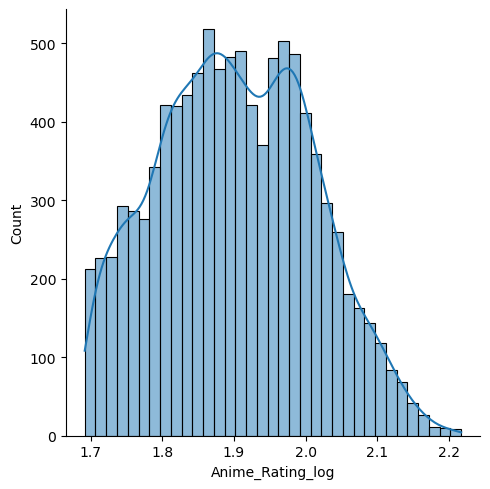

In [95]:
sns.displot(df["Anime_Rating_log"], kde=True)

In [96]:
variavel_original = df['Anime_Rating']
variavel_transformada_log1p = np.log1p(variavel_original)

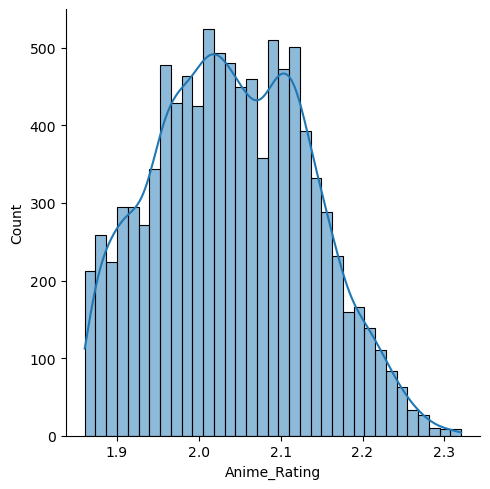

In [97]:
sns.displot(variavel_transformada_log1p, kde=True)

## Train test split

In [98]:
X = np.expand_dims(padded_texts, axis=2)
y = np.array(df["Anime_Rating"].values)
y_norm = np.array(df["Anime_Rating_norm"].values)

#y_log1p = np.array(variavel_transformada_log1p)
#y_log = np.array(df["Anime_Rating_norm"].values)

In [99]:
len(X), len(y)

(10000, 10000)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_norm,
                                                    test_size=0.3,
                                                    random_state=42)

In [102]:
len(X_train), len(y_train)

(7000, 7000)

# Modeling - Modelagem
- https://dnc.group/blog/data-science/metodologia-crisp-dm/


## Deep Learning

In [103]:
max_sequence_length = max(len(text) for text in sequences)

In [104]:
# Definir o número de folds
num_folds = 5

# Criar o objeto KFold
kfold = KFold(n_splits=num_folds, shuffle=True)

# Listas para armazenar as métricas de desempenho
loss_scores = []
mse_scores = []
mae_scores = []

train_loss_scores = []
train_mse_scores = []
train_mae_scores = []

# Iterar sobre os folds
for train_index, test_index in kfold.split(X):
    
    # Separar os conjuntos de treinamento e teste
    X_train_k, X_test_k = X[train_index], X[test_index]
    y_train_k, y_test_k = y_norm[train_index], y_norm[test_index]
    
    # Definir o modelo LSTM
    model = Sequential()
    model.add(Embedding(len(vocab), 300, weights=[np.array(list(word_vectors.values()))], input_length=max_sequence_length, trainable=False))
    model.add(LSTM(64, return_sequences=True))  # Segunda camada LSTM , activation='relu'
    model.add(LSTM(32)) #, activation='relu'
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    
    # Compilar o modelo com o otimizador Adama
    optimizer = Adam(learning_rate=2e-5, epsilon=1e-08)
    
    # Compilar o modelo
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
    # Treinar o modelo
    model.fit(X_train_k, y_train_k,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(X_test_k, y_test_k),
              callbacks=[tf.keras.callbacks.EarlyStopping(
                         monitor='val_loss',
                         patience=10)]
             )
    
    # Avaliar o modelo nos dados de teste
    loss, mae, mse = model.evaluate(X_test_k, y_test_k)
    
    # Avaliar o modelo nos dados de treino
    train_loss, train_mae, train_mse = model.evaluate(X_train_k, y_train_k)
    
    # Armazenar as métricas de desempenho nos dados de teste
    loss_scores.append(loss)
    mse_scores.append(mse)
    mae_scores.append(mae)
    
    # Armazenar as métricas de desempenho nos dados de treino
    train_loss_scores.append(train_loss)
    train_mse_scores.append(train_mse)
    train_mae_scores.append(train_mae)

Epoch 1/10
63/63 [==============================] - 26s 332ms/step - loss: 0.1531 - mae: 0.3397 - mse: 0.1531 - val_loss: 0.1452 - val_mae: 0.3258 - val_mse: 0.1452
Epoch 2/10
63/63 [==============================] - 20s 316ms/step - loss: 0.1345 - mae: 0.3123 - mse: 0.1345 - val_loss: 0.1213 - val_mae: 0.2904 - val_mse: 0.1213
Epoch 3/10
63/63 [==============================] - 20s 315ms/step - loss: 0.1019 - mae: 0.2622 - mse: 0.1019 - val_loss: 0.0780 - val_mae: 0.2236 - val_mse: 0.0780
Epoch 4/10
63/63 [==============================] - 20s 319ms/step - loss: 0.0532 - mae: 0.1837 - mse: 0.0532 - val_loss: 0.0395 - val_mae: 0.1665 - val_mse: 0.0395
Epoch 5/10
63/63 [==============================] - 20s 322ms/step - loss: 0.0400 - mae: 0.1637 - mse: 0.0400 - val_loss: 0.0396 - val_mae: 0.1661 - val_mse: 0.0396
Epoch 6/10
63/63 [==============================] - 19s 301ms/step - loss: 0.0401 - mae: 0.1648 - mse: 0.0401 - val_loss: 0.0396 - val_mae: 0.1661 - val_mse: 0.0396
Epoch 7/10

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 278, 300)          9858600   
                                                                 
 lstm_8 (LSTM)               (None, 278, 64)           93440     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,964,489
Trainable params: 105,889
Non-trainable params: 9,858,600
_________________________________________________________________


In [106]:
# Avaliar o modelo nos dados de treinamento
print("Métricas nos dados de treinamento:")
print("MSE:", np.mean(train_mse_scores))
print("MAE:", np.mean(train_mae_scores))

# Avaliar o modelo nos dados de teste
print("Métricas nos dados de teste:")
print("Mean Squared Error (MSE):", np.mean(mse_scores))
print("Mean Absolute Error (MAE):", np.mean(mae_scores))


Métricas nos dados de treinamento:
MSE: 0.038136120140552524
MAE: 0.16111110746860505
Métricas nos dados de teste:
Mean Squared Error (MSE): 0.03817862346768379
Mean Absolute Error (MAE): 0.16126067340373992


# Evaluation - Avaliação do Modelo

In [107]:
# Exemplo de novos textos
new_texts = [   
                "Stop motion animation of aliens on a guided tour around an amusement park. \n\n(Source: AniDB) ",
                "In a world where elemental powers are the norm, a group of young heroes emerges to protect the balance of the elements. Each hero possesses a unique elemental ability and must master their powers to defend their realm from an ancient evil that seeks to engulf the world in darkness. Together, they embark on an epic journey filled with perilous quests, intense battles, and profound revelations that will test their strength and resolve.",
                "In a world where dreams hold incredible power, a young dreamweaver named Luna embarks on a quest to restore harmony to the realm of dreams. With the ability to enter and manipulate dreams, Luna must confront the nightmares that plague the dreamers and threaten to consume their souls. Along her journey, she forms a diverse group of allies, each with their own unique dream-based abilities. Together, they must unravel the mysteries of the dream realm and confront the malevolent forces that seek to corrupt and control it.",
                "In the far reaches of space, a war rages between cosmic empires. Amidst the chaos, a group of elite warriors known as the Astral Warriors emerges. Each warrior wields a celestial weapon infused with the power of the stars. Bound by a common purpose, they must navigate treacherous galaxies, confront formidable foes, and unlock the secrets of the astral realm. As the fate of the universe hangs in the balance, the Astral Warriors must rise to the challenge and fulfill their destinies.",
                "In order for something to be obtained, something of equal value must be lost. Alchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward\'s right arm that he is able to affix Alphonse\'s soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their original bodies that gives Edward the inspiration to obtain metal limbs called  and become a state alchemist, the Fullmetal Alchemist.\n\r\nThree years of searching later, the brothers seek the Philosopher\'s Stone, a mythical relic that allows an alchemist to overcome the Law of Equivalent Exchange. Even with military allies Colonel Roy Mustang, Lieutenant Riza Hawkeye, and Lieutenant Colonel Maes Hughes on their side, the brothers find themselves caught up in a nationwide conspiracy that leads them not only to the true nature of the elusive Philosopher\'s Stone, but their country\'s murky history as well. In between finding a serial killer and racing against time, Edward and Alphonse must ask themselves if what they are doing will make them human again... or take away their humanity.\n\r\n[Written by MAL Rewrite"
            ]

# Pré-processamento dos novos textos
#preprocessed_new_texts = [preprocess(texto) for texto in new_texts]
preprocessed_new_texts = []
for text in new_texts:
    preprocessed_tokens, _ = preprocess(text)
    preprocessed_new_texts.append(preprocessed_tokens)


# Substituição das palavras por seus índices
indexed_new_texts = []
for text in preprocessed_new_texts:
    indexed_text = [word2index.get(word, 0) for word in text]  # Use 0 for unknown words
    indexed_new_texts.append(indexed_text)

# Padding
padded_new_texts = pad_sequences(indexed_new_texts, maxlen=max_sequence_length, padding='post')

# Transformar os dados para o formato correto (adicionar dimensão)
padded_new_texts = np.expand_dims(padded_new_texts, axis=-1)
 
# Fazer as previsões
predictions = model.predict(padded_new_texts)

# Reverter a escala das previsões usando a transformação inversa do MinMaxScaler
predictions = minMax.inverse_transform(predictions)

# Imprimir as previsões
for prediction in predictions:
    print("Prediction:", prediction)    

1/1 [==============================] - 1s 910ms/step
Prediction: [6.699478]
Prediction: [6.699479]
Prediction: [6.699479]
Prediction: [6.6994777]
Prediction: [6.6994777]


**Insights**:

O modelo está apresentando ótimas métricas, porém, na predição, não estamos vendo isso. Quando passamos um novo texto para o modelo, ele sempre retorna a mesma nota, variando entre 6.5 e 6.7.

- Com o Y normalizado, utilizando 10 épocas e k=5:
    - Mean Squared Error (MSE): 0.03833910003304482
    - Mean Absolute Error (MAE): 0.16108860671520234

- Com o Y log1p, utilizando 10 épocas e k=5:
    - Mean Squared Error (MSE): 0.03818032741546631
    - Mean Absolute Error (MAE): 0.16182503402233123 
    
- Com 4000 dados utilizando amostragem simples e sem outliers, com o Y normalizado, utilizando 10 épocas e k=5:    
    - Mean Squared Error (MSE): 0.047805754095315935
    - Mean Absolute Error (MAE): 0.1797858566045761



**Melhorias futuras:**

    - Realizar uma análise mais **aprofundada** dos dados, considerando outros atributos além das sinopses, como gênero, estúdio de produção, número de episódios, entre outros, para melhorar a capacidade de previsão do modelo.
    - Realizar uma análise mais detalhada dos dados de entrada, buscando possíveis erros ou inconsistências que possam estar afetando o desempenho do modelo.
    - Experimentar arquiteturas de modelos mais avançadas, como redes neurais convolucionais (CNNs) ou modelos baseados em **transformers**, que podem capturar representações mais complexas e contextuais dos textos.
    - Realizar um estudo de **feature engineering**, criando novas variáveis a partir dos dados existentes que possam ser relevantes para a predição da nota dos animes.

# Deployment